# Import packages

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import matplotlib.pyplot as plt
from nltk import cluster
from nltk.cluster import cosine_distance

In [2]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("reuters")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to /Users/admin/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Obtain data set

In [3]:
from nltk.corpus import reuters as corpus

num_of_documents = 100
docs = [corpus.words(fileid) for fileid in corpus.fileids()[:num_of_documents]]

print("Number of documents:", len(docs))

Number of documents: 100


# Preprocessing

In [4]:
en_stop = nltk.corpus.stopwords.words('english')
en_stop= ["``","/",",.",".,",";","--",":",")","(",'"','&',"'",'),',',"','-','.,','.,"','.-',"?",">","<"]                  \
         +["0","1","2","3","4","5","6","7","8","9","10","11","12","86","1986","1987","000"]                                                      \
         +["said","say","u","v","mln","ct","net","dlrs","tonne","pct","shr","nil","company","lt","share","year","billion","price"]          \
         +en_stop

In [5]:
from nltk.corpus import wordnet as wn

def preprocess_word(word, stopwordset):
    
    word=word.lower()
    
    if word in [",","."]:
        return None
    
    if word in stopwordset:
        return None
    
    lemma = wn.morphy(word)
    if lemma is None:
        return word

    elif lemma in stopwordset: 
        return None
    else:
        return lemma
    

def preprocess_document(document):
    document=[preprocess_word(w, en_stop) for w in document]
    document=[w for w in document if w is not None]
    return document

def preprocess_documents(documents):
    return [preprocess_document(document) for document in documents]

In [6]:
pre_docs = preprocess_documents(docs)

print("Before preprocessing:")
print(docs[0][:25])
print("After preprocessing:")
print(pre_docs[0][:25])

Before preprocessing:
['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears']
After preprocessing:
['asian', 'exporter', 'fear', 'damage', 'japan', 'rift', 'mounting', 'trade', 'friction', 'japan', 'raise', 'fear', 'among', 'many', 'asia', 'exporting', 'nation', 'row', 'could', 'inflict', 'far', 'reaching', 'economic', 'damage', 'businessmen']


# Clustering 

In [7]:
pre_docs_for_tfidf = ["".join(doc) for doc in pre_docs]
print(pre_docs_for_tfidf[0])

vectorizer = TfidfVectorizer(max_features = 200, token_pattern = u'(?u)\\b\\w+\\b')

asianexporterfeardamagejapanriftmountingtradefrictionjapanraisefearamongmanyasiaexportingnationrowcouldinflictfarreachingeconomicdamagebusinessmenofficialtellreutercorrespondentasiancapitalmovejapanmightboostprotectionistsentimentleadcurbamericanimportproductexporterconflictwouldhurtlongrunshorttermtokyolossmightgainimpose300tariffimportjapaneseelectronicsgoodapril17retaliationjapanallegefailurestickpactsellsemiconductorworldmarketcostunofficialjapaneseestimateputimpacttariffspokesmanmajorelectronicsfirmwouldvirtuallyhaltexportproducthitnewtaxablebusinessspokesmanleadingjapaneseelectronicsfirmmatsushitaelectricindustrialcoltdmc>.tariffremainplacelengthtimebeyondmonthmeancompleteerosionexportgoodsubjecttarifftommurthastockanalysttokyoofficebrokerjamescapelco>.taiwanbusinessmenofficialalsoworryawareseriousnessthreatjapanservewarningusseniortaiwanesetradeofficialasknametaiwantradetradesurplus15last95surplushelpswelltaiwanforeignexchangereserves53amongworldlargemustquicklyopenmarketremovet

In [8]:
tf_idf = vectorizer.fit_transform(pre_docs_for_tfidf)

## k = 3

In [9]:
num_clusters = 3

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = num_clusters, random_state = 0)
clusters = km.fit_predict(tf_idf)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
print("Distortion is:", km.inertia_)

Distortion is: 96.37257016395905


In [12]:
for doc, cls in zip(pre_docs[0], clusters):
    print(cls, doc)

0 asian
0 exporter
0 fear
0 damage
0 japan
0 rift
0 mounting
0 trade
0 friction
0 japan
0 raise
0 fear
0 among
0 many
2 asia
0 exporting
0 nation
0 row
0 could
0 inflict
0 far
0 reaching
0 economic
0 damage
0 businessmen
0 official
0 tell
1 reuter
0 correspondent
0 asian
0 capital
0 move
0 japan
0 might
0 boost
0 protectionist
0 sentiment
0 lead
0 curb
0 american
0 import
0 product
1 exporter
0 conflict
0 would
0 hurt
0 long
0 run
0 short
0 term
0 tokyo
0 loss
0 might
0 gain
0 impose
0 300
0 tariff
0 import
0 japanese
0 electronics
0 good
0 april
0 17
0 retaliation
0 japan
0 allege
0 failure
0 stick
0 pact
0 sell
0 semiconductor
0 world
0 market
0 cost
0 unofficial
0 japanese
0 estimate
0 put
0 impact
0 tariff
0 spokesman
0 major
0 electronics
0 firm
0 would
0 virtually
0 halt
0 export
0 product
0 hit
0 new
0 tax
0 able
0 business
0 spokesman
0 leading
0 japanese
0 electronics
0 firm
0 matsushita


## k = 5

In [13]:
num_clusters = 5

km = KMeans(n_clusters = num_clusters, random_state = 0)
clusters = km.fit_predict(tf_idf)
clusters

for doc, cls in zip(pre_docs[0], clusters):
    print(cls, doc)

print("Distortion is:", km.inertia_)

0 asian
0 exporter
0 fear
0 damage
0 japan
0 rift
0 mounting
0 trade
0 friction
0 japan
0 raise
0 fear
0 among
3 many
2 asia
0 exporting
0 nation
0 row
0 could
0 inflict
0 far
0 reaching
0 economic
0 damage
0 businessmen
0 official
0 tell
1 reuter
0 correspondent
0 asian
0 capital
0 move
0 japan
0 might
0 boost
0 protectionist
0 sentiment
0 lead
0 curb
4 american
0 import
0 product
1 exporter
0 conflict
0 would
0 hurt
0 long
0 run
0 short
0 term
0 tokyo
0 loss
0 might
0 gain
0 impose
0 300
0 tariff
0 import
0 japanese
0 electronics
0 good
0 april
0 17
0 retaliation
0 japan
0 allege
0 failure
0 stick
0 pact
0 sell
0 semiconductor
0 world
0 market
0 cost
0 unofficial
0 japanese
0 estimate
0 put
0 impact
0 tariff
0 spokesman
0 major
0 electronics
0 firm
0 would
0 virtually
0 halt
0 export
0 product
0 hit
0 new
0 tax
0 able
0 business
0 spokesman
0 leading
0 japanese
0 electronics
0 firm
0 matsushita
Distortion is: 94.37257016395904


## k = 10

In [14]:
num_clusters = 10

km = KMeans(n_clusters = num_clusters, random_state = 0)
clusters = km.fit_predict(tf_idf)
clusters

for doc, cls in zip(pre_docs[0], clusters):
    print(cls, doc)

print("Distortion is:", km.inertia_)

0 asian
0 exporter
0 fear
0 damage
0 japan
0 rift
0 mounting
0 trade
0 friction
0 japan
0 raise
0 fear
0 among
0 many
0 asia
0 exporting
0 nation
0 row
0 could
0 inflict
0 far
0 reaching
0 economic
3 damage
0 businessmen
0 official
0 tell
9 reuter
0 correspondent
0 asian
0 capital
0 move
0 japan
5 might
0 boost
0 protectionist
0 sentiment
0 lead
0 curb
0 american
0 import
0 product
9 exporter
0 conflict
0 would
0 hurt
0 long
0 run
0 short
0 term
0 tokyo
0 loss
0 might
8 gain
0 impose
0 300
0 tariff
0 import
0 japanese
0 electronics
0 good
0 april
0 17
0 retaliation
0 japan
0 allege
0 failure
1 stick
0 pact
0 sell
7 semiconductor
0 world
6 market
0 cost
4 unofficial
0 japanese
0 estimate
0 put
0 impact
0 tariff
0 spokesman
0 major
0 electronics
0 firm
0 would
0 virtually
0 halt
0 export
0 product
0 hit
0 new
0 tax
0 able
0 business
0 spokesman
0 leading
0 japanese
0 electronics
2 firm
0 matsushita
Distortion is: 89.37257016395928


## The elbow method

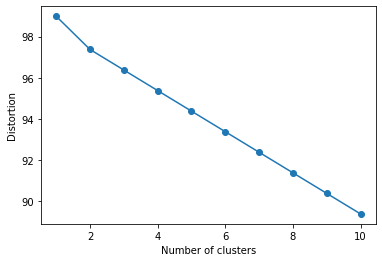

In [15]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit_predict(tf_idf)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()